# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [59]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [60]:
# your code here

employee = pd.read_csv(r'/Users/tinghaokao/Desktop/IronHackDA/DAFT_212/module_2/Lab_5_ Pivot-Tables-and-Crosstab/Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [107]:
# Method 1
# your code here

employee.groupby('Department')[['Salary']].agg('mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [62]:
# Method 2
# your code here

employee.pivot_table(index = ['Department'], values=['Salary'], aggfunc='mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [63]:
# your code here

employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc='mean')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [111]:
# your code here

employee.pivot_table(index=['Title'], values=['Salary'], columns = ['Years'], aggfunc='sum').fillna('?')

Salary                               
Years          1     2     3     4     7      8
Title                                          
VP             ?     ?     ?     ?     ?  140.0
analyst     35.0  60.0     ?  35.0     ?      ?
associate      ?  55.0  55.0     ?  60.0      ?

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [112]:
# your code here
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc={'Salary': 'mean','Title': 'count'}).rename(columns={'Title': 'Count'})

Salary  Count
Department Title                   
HR         VP           70.0      1
           analyst      32.5      2
IT         VP           70.0      1
           analyst      32.5      2
           associate    60.0      1
Sales      associate    55.0      2

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [66]:
# your code here

# Median
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc={'Salary': 'median'})

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

In [67]:
# Minimum
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc={'Salary': 'min'})

Salary
Department Title            
HR         VP             70
           analyst        30
IT         VP             70
           analyst        30
           associate      60
Sales      associate      55

In [68]:
# Maximum
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc={'Salary': 'max'})

Salary
Department Title            
HR         VP             70
           analyst        35
IT         VP             70
           analyst        35
           associate      60
Sales      associate      55

In [69]:
# Mean
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc={'Salary': 'mean'})

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

In [70]:
# STD
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc={'Salary': 'std'})

,,Salary
Department,Title,
HR,analyst,3.535534
IT,analyst,3.535534
Sales,associate,0.000000


In [71]:
"""
your commments here
"""

'\nyour commments here\n'

In [115]:
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=('median', 'min', 'max', 'mean', 'std'))

Salary                             
                        max  mean median   min       std
Department Title                                        
HR         VP          70.0  70.0   70.0  70.0       NaN
           analyst     35.0  32.5   32.5  30.0  3.535534
IT         VP          70.0  70.0   70.0  70.0       NaN
           analyst     35.0  32.5   32.5  30.0  3.535534
           associate   60.0  60.0   60.0  60.0       NaN
Sales      associate   55.0  55.0   55.0  55.0  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [117]:
# your code here

employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=('median', 'min', 'max', 'mean', 'std')).fillna(0)

Salary                             
                        max  mean median   min       std
Department Title                                        
HR         VP          70.0  70.0   70.0  70.0  0.000000
           analyst     35.0  32.5   32.5  30.0  3.535534
IT         VP          70.0  70.0   70.0  70.0  0.000000
           analyst     35.0  32.5   32.5  30.0  3.535534
           associate   60.0  60.0   60.0  60.0  0.000000
Sales      associate   55.0  55.0   55.0  55.0  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [122]:
# your code here
employee.pivot_table(index=['Department', 'Title'], values=['Salary','Name'], aggfunc={'Salary': 'sum', 'Name': 'count'}).rename(columns={'Name':'HeadCount'})

HeadCount  Salary
Department Title                       
HR         VP                 1      70
           analyst            2      65
IT         VP                 1      70
           analyst            2      65
           associate          1      60
Sales      associate          2     110

#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [124]:
# your code here
employee.pivot_table(index=['Department', 'Title'], values = ['Salary', 'Years'], aggfunc={'Salary':'mean', 'Years':'sum'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [127]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [102]:
# your code here
fitbit = pd.read_csv(r'/Users/tinghaokao/Desktop/IronHackDA/DAFT_212/module_2/Lab_5_ Pivot-Tables-and-Crosstab/Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [128]:
# your code here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [130]:
# your code here

# general correlation of the entire dataset
fitbit.corr()
# correlation bewteen two specific columns
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [131]:
import matplotlib.pyplot as plt;

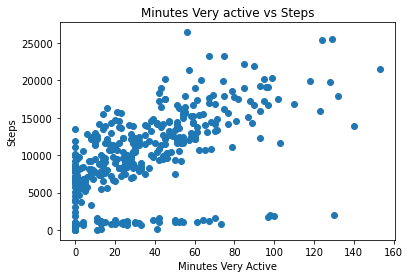

In [132]:
plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.title('Minutes Very active vs Steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [134]:
"""
It has a positive correlation with some exceptions.
"""

'\nIt has a positive correlation with some exceptions.\n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [137]:
# your code here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990092

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

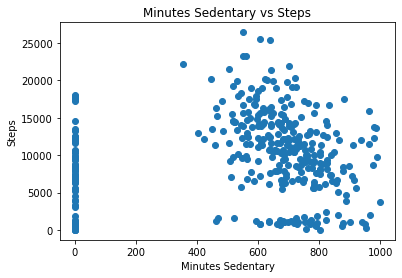

In [138]:
# your code here

plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.title('Minutes Sedentary vs Steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [84]:
"""
A negative correlation as compared to the previous one
"""

'\nyour commments here\n'

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [139]:
# your code here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836386

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

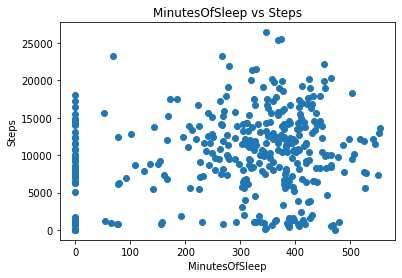

In [140]:
# your code here

plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.title('MinutesOfSleep vs Steps')
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.show()

In [141]:
"""
Not much correlation observed
"""

'\nNot much correlation observed\n'

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [143]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [146]:
# your code here
cor_fit = fitbit[columns].corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [149]:
# your code here

cor_fit['Steps'].sort_values(ascending=False)
# Minutes Very Active is highly correlated with Steps

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [164]:
# your code here

tb = pd.read_csv(r'/Users/tinghaokao/Desktop/IronHackDA/DAFT_212/module_2/Lab_5_ Pivot-Tables-and-Crosstab/Time_Grades.csv')
df = tb.sort_values(by='Study time', ascending = True)
df

,Name,Study time,Grade
12,Jonathan,2,1
14,Pilar,3,2
0,Jose,4,4
5,Eva,5,3
7,Pedro,6,5
9,Gervasio,7,3
10,Gemma,7,8
2,David,8,9
1,Maria,9,7
3,Sonia,10,7


#### Show visually the frequency distribution of the `time_grades` dataset.

array([[<AxesSubplot:title={'center':'Study time'}>,
        <AxesSubplot:title={'center':'Grade'}>]], dtype=object)

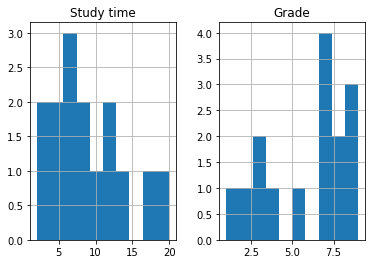

In [166]:
# your code here
df.hist()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [168]:
# your code here
cor_p = df['Study time'].corr(df['Grade'])
cor_p

0.7980456073578858

In [170]:
cor_s = df['Study time'].corr(df['Grade'], method = 'spearman')
cor_s

0.819658753036942

In [171]:
"""
Yes there is a positive correlation between Study time and Grade, with both methods
"""

'\nYes there is a positive correlation between Study time and Grade, with both methods\n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

<AxesSubplot:>

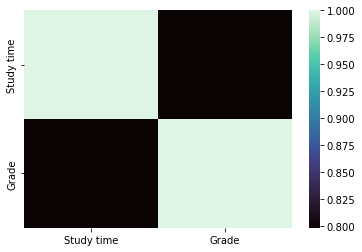

In [181]:
# your code here
cotable = df.corr()
sns.heatmap(cotable, cmap='mako')

In [187]:
cotable

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [212]:
df.head()

,Study time,Grade
0,2,1.0
1,3,2.0
2,4,4.0
3,5,3.0
4,6,5.0


In [210]:
cor_graph = df.groupby('Grade')['Study time'].agg('mean')
cor_graph.reset_index()

,Grade,Study time
0,1.0,2.000000
1,2.0,3.000000
2,3.0,5.000000
3,4.0,4.000000
4,5.0,6.000000
5,5.5,7.000000
6,7.0,10.500000
7,8.0,13.000000
8,9.0,15.333333


Text(0, 0.5, 'Study time')

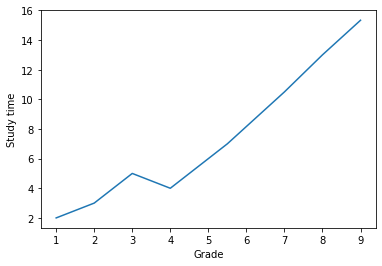

In [211]:
cor_graph.plot(x='Grade', y='Study time')
plt.xlabel('Grade')
plt.ylabel('Study time')

#### Could you explain the difference between Pearson and Spearman correlations?

In [214]:
'''
Pearson: checks the linear correlation
Spearman: checks whether the data is moving in the same direction
'''

'\nPearson: checks the linear correlation\nSpearman: checks whether the data is moving in the same direction\n'